In [1]:
import os
os.chdir('..')

In [2]:
from tensorflow.python.summary.summary_iterator import summary_iterator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn-darkgrid")
def get_from_logfile(path, tags):
    returns = np.empty((100000,len(tags)))
    returns[:] = np.nan
    it = 0

    for ev, event in enumerate(summary_iterator(path)):
        for value in event.summary.value:
            if value.tag in tags:
                idx = tags.index(value.tag)
                returns[it, idx] = value.simple_value
                if idx == 0 and ev!=0:
                    it += 1

    return pd.DataFrame(returns, columns = tags).dropna()

## Problem 2

In [13]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q2" in path and name.endswith("JesperPC"))]

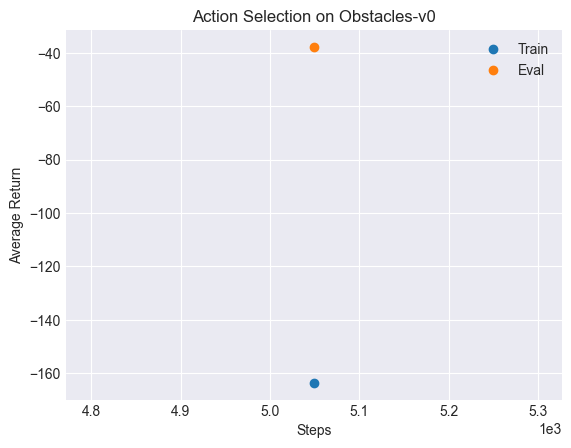

In [14]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
mb = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Train_AverageReturn", "Eval_AverageReturn"])
mb['Train_EnvstepsSoFar'] = mb['Train_EnvstepsSoFar']-1
mb.set_index("Train_EnvstepsSoFar", inplace=True)
mb.columns = ["Train", "Eval"]
for col in mb.columns:
    plt.plot(mb[col], "o", label=col)
plt.legend()
plt.ylabel("Average Return")
plt.xlabel("Steps")
plt.title("Action Selection on Obstacles-v0");
plt.savefig("report/question2.jpg", dpi=600)

## Problem 3

In [64]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q3" in path and "events" in name)]

In [65]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q3_cheetah_cheetah-cs285-v0_01-11-2022_02-52-29\\events.out.tfevents.1667271149.e9cc204bf8e8',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q3_obstacles_obstacles-cs285-v0_28-10-2022_15-56-32\\events.out.tfevents.1666997792.JesperPC',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q3_reacher_reacher-cs285-v0_03-11-2022_19-13-47\\events.out.tfevents.1667502827.5d6613519d13']

In [66]:
p3_cheetah = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
p3_obstacles = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
p3_reacher = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
p3_cheetah.set_index("Train_EnvstepsSoFar", inplace=True)
p3_obstacles.set_index("Train_EnvstepsSoFar", inplace=True)
p3_reacher.set_index("Train_EnvstepsSoFar", inplace=True)

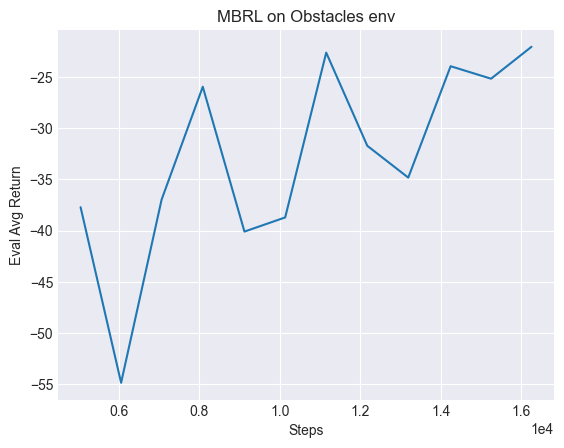

In [67]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(p3_obstacles)
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("MBRL on Obstacles env");
plt.savefig("report/q3_obstacles.jpg", dpi=600)

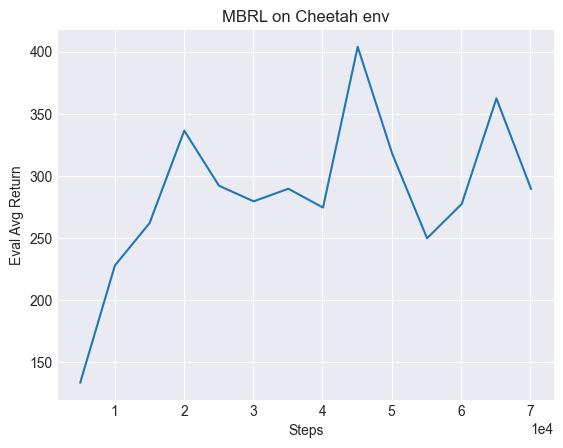

In [68]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(p3_cheetah)
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("MBRL on Cheetah env");
plt.savefig("report/q3_cheetah.jpg", dpi=600)

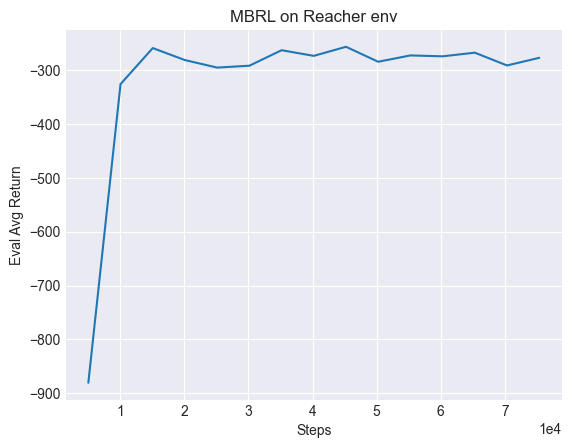

In [69]:
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(p3_reacher)
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("MBRL on Reacher env");
plt.savefig("report/q3_reacher.jpg", dpi=600)

## Problem 4

In [45]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q4" in path and "events" in name)]

In [46]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q4_reacher_ensemble1_reacher-cs285-v0_02-11-2022_04-50-40\\events.out.tfevents.1667364640.f7a3e66f10fd',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q4_reacher_ensemble3_reacher-cs285-v0_02-11-2022_05-13-02\\events.out.tfevents.1667365982.f7a3e66f10fd',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q4_reacher_ensemble5_reacher-cs285-v0_02-11-2022_06-18-56\\events.out.tfevents.1667369936.f7a3e66f10fd',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q4_reacher_horizon15_reacher-cs285-v0_01-11-2022_15-55-37\\events.out.tfevents.1667318137.b54aaf52073f',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q4_reacher_horizon30_reacher-cs285-v0_01-11-2022_23-29-50\\events.out.tfevents.1667345390.f7a3e66f10fd',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\

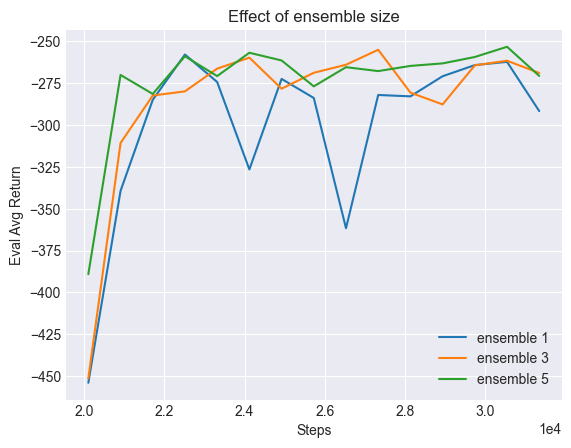

In [47]:
ensemble_1 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
ensemble_1.set_index("Train_EnvstepsSoFar", inplace=True)
ensemble_1.columns = ["ensemble_1"]

ensemble_3 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
ensemble_3.set_index("Train_EnvstepsSoFar", inplace=True)
ensemble_3.columns = ["ensemble_3"]

ensemble_5 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
ensemble_5.set_index("Train_EnvstepsSoFar", inplace=True)
ensemble_5.columns = ["ensemble_5"]

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(ensemble_1, label="ensemble 1")
plt.plot(ensemble_3, label="ensemble 3")
plt.plot(ensemble_5, label="ensemble 5")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Effect of ensemble size");
plt.savefig("report/question4_ensemble.jpg", dpi=600)

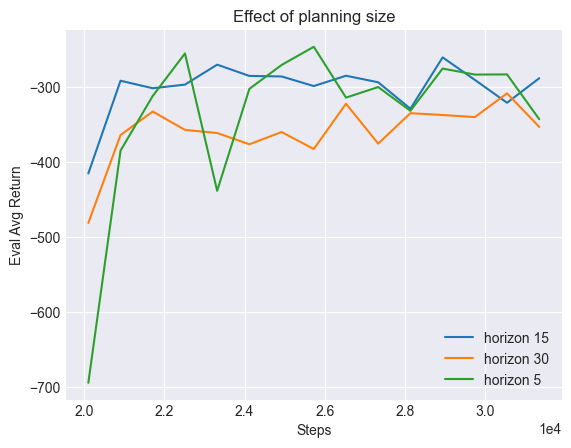

In [48]:
horizon_15 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
horizon_15.set_index("Train_EnvstepsSoFar", inplace=True)
horizon_15.columns = ["horizon_15"]

horizon_30 = get_from_logfile(files[4], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
horizon_30.set_index("Train_EnvstepsSoFar", inplace=True)
horizon_30.columns = ["horizon_30"]

horizon_5 = get_from_logfile(files[5], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
horizon_5.set_index("Train_EnvstepsSoFar", inplace=True)
horizon_5.columns = ["horizon_5"]

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(horizon_15, label="horizon 15")
plt.plot(horizon_30, label="horizon 30")
plt.plot(horizon_5, label="horizon 5")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Effect of planning size");
plt.savefig("report/question4_horizon.jpg", dpi=600)

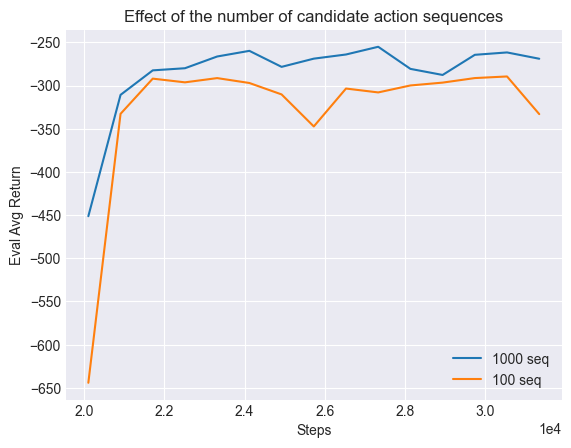

In [49]:
numseq_1000 = get_from_logfile(files[6], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
numseq_1000.set_index("Train_EnvstepsSoFar", inplace=True)
numseq_1000.columns = ["numseq_1000"]

numseq_100 = get_from_logfile(files[7], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
numseq_100.set_index("Train_EnvstepsSoFar", inplace=True)
numseq_100.columns = ["numseq_100"]

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(numseq_1000, label="1000 seq")
plt.plot(numseq_100, label="100 seq")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("Effect of the number of candidate action sequences");
plt.savefig("report/question4_sequences.jpg", dpi=600)

## Problem 5

In [52]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q5" in path and "events" in name)]

In [53]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q5_cheetah_cem_2_cheetah-cs285-v0_03-11-2022_14-25-30\\events.out.tfevents.1667485530.5d6613519d13',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q5_cheetah_cem_4_cheetah-cs285-v0_03-11-2022_04-57-27\\events.out.tfevents.1667451447.98d2eede953d',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q5_cheetah_random_cheetah-cs285-v0_02-11-2022_21-46-49\\events.out.tfevents.1667425609.c2bc42089664']

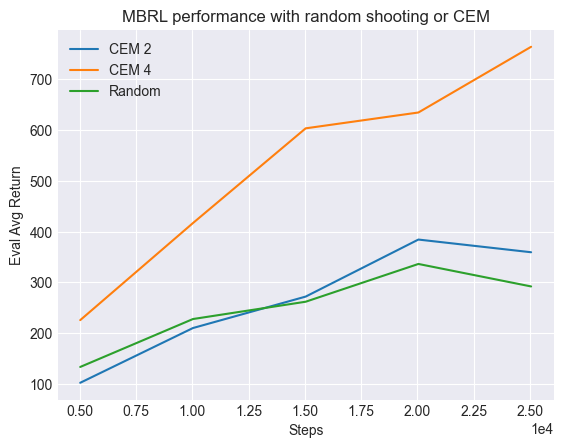

In [54]:
cem_2 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
cem_2.set_index("Train_EnvstepsSoFar", inplace=True)
cem_2.columns = ["cem_2"]

cem_4 = get_from_logfile(files[1], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
cem_4.set_index("Train_EnvstepsSoFar", inplace=True)
cem_4.columns = ["cem_4"]

random = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
random.set_index("Train_EnvstepsSoFar", inplace=True)
random.columns = ["random"]

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(cem_2, label="CEM 2")
plt.plot(cem_4, label="CEM 4")
plt.plot(random, label="Random")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("MBRL performance with random shooting or CEM");
plt.savefig("report/question5.jpg", dpi=600)

## Problem 6

In [70]:
root = os.path.join(os.getcwd(), "data")
files = [os.path.join(path, name) for path, subdirs, files in os.walk(root) for name in files if ("q6" in path and "events" in name)]

In [71]:
files

['c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q6_cheetah_rlen10_cheetah-cs285-v0_03-11-2022_18-20-35\\events.out.tfevents.1667499635.5d6613519d13',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q6_cheetah_rlen1_cheetah-cs285-v0_03-11-2022_17-37-06\\events.out.tfevents.1667497026.5d6613519d13',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q6_cheetah_rlen1_cheetah-cs285-v0_03-11-2022_23-26-13\\events.out.tfevents.1667517973.5d6613519d13',
 'c:\\Users\\Bruger\\Documents\\homework_fall2022\\homework_fall2022\\hw4\\data\\hw4_q6_cheetah_rlenl0_cheetah-cs285-v0_03-11-2022_17-20-56\\events.out.tfevents.1667496056.5d6613519d13']

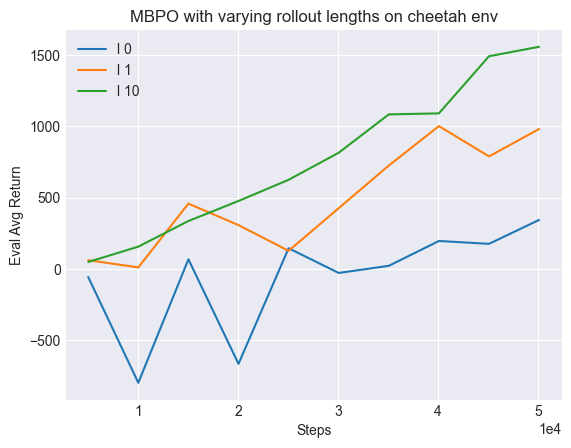

In [78]:
rlen0 = get_from_logfile(files[3], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
rlen0.set_index("Train_EnvstepsSoFar", inplace=True)

rlen1 = get_from_logfile(files[2], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
rlen1.set_index("Train_EnvstepsSoFar", inplace=True)
rlen1 = rlen1.loc[lambda x: x['Eval_AverageReturn'] > 0]

rlen10 = get_from_logfile(files[0], ["Train_EnvstepsSoFar", "Eval_AverageReturn"])
rlen10.set_index("Train_EnvstepsSoFar", inplace=True)

plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.plot(rlen0, label="l 0")
plt.plot(rlen1, label="l 1")
plt.plot(rlen10, label="l 10")
plt.legend()
plt.ylabel("Eval Avg Return")
plt.xlabel("Steps")
plt.title("MBPO with varying rollout lengths on cheetah env");
plt.savefig("report/question6.jpg", dpi=600)